In [39]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

### Jump to PageRank approach

In [28]:
def fetch_git_data(url):
    pages = []
    res=requests.get(url,headers={'Authorization': 'token ' + 'b96f1edb9a2439bda078fde56d3c26f636632b5c', 'Accept': 'application/vnd.github.squirrel-girl-preview+json'})
    data=res.json()
    pages.append(data)
    #counter = 0
    #print (res.links.keys())
    while 'next' in res.links.keys():
        #counter += 1
        res = requests.get(res.links['next']['url'], headers={'Authorization': 'token ' + 'b96f1edb9a2439bda078fde56d3c26f636632b5c', 'Accept': 'application/vnd.github.squirrel-girl-preview+json'})
        pages.append(res.json())
    #print(len(pages))
    return pages

# User 

In [3]:
#url = "https://api.github.com/search/users?q=repos:%3E5+followers:%3E1000"
url = "https://api.github.com/search/users?q=followers:%3E1000&per_page=100"
data = fetch_git_data(url)
print ('done')

done


In [4]:
len(data)

10

In [5]:
df = pd.DataFrame(data)
df

,incomplete_results,items,total_count
0,False,"[{'login': 'torvalds', 'id': 1024025, 'node_id...",2158
1,False,"[{'login': 'wesm', 'id': 329591, 'node_id': 'M...",2158
2,False,"[{'login': 'notwaldorf', 'id': 1369170, 'node_...",2158
3,False,"[{'login': 'kesenhoo', 'id': 1456490, 'node_id...",2158
4,False,"[{'login': 'mattdesl', 'id': 1383811, 'node_id...",2158
5,False,"[{'login': 'halfrost', 'id': 10825609, 'node_i...",2158
6,False,"[{'login': 'dlew', 'id': 514850, 'node_id': 'M...",2158
7,False,"[{'login': 'soulwire', 'id': 346311, 'node_id'...",2158
8,False,"[{'login': 'chyyuu', 'id': 2077445, 'node_id':...",2158
9,False,"[{'login': 'EduardoPires', 'id': 5068797, 'nod...",2158


In [6]:
def get_user(df):
    users = pd.DataFrame()
    for y in df['items']:
        x = list(y)
        users = users.append(x, ignore_index=True)
    return users

In [7]:
users = get_user(df)

In [8]:
users.columns

Index(['avatar_url', 'events_url', 'followers_url', 'following_url',
       'gists_url', 'gravatar_id', 'html_url', 'id', 'login', 'node_id',
       'organizations_url', 'received_events_url', 'repos_url', 'score',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'url'],
      dtype='object')

### PageRank approch starts here

In [ ]:
#login_list = list(users.login)

login_list = ['torvalds',
 'JakeWharton',
 'Tj',
 'mojombo',
 'gaearon',
 'paulirish',
 'addyosmani',
 'ruanyf',
 'yyx990803',
 'sindresorhus',
 'defunkt',
 'kennethreitz',
 'angusshire',
 'douglascrockford',
 'mbostock',
 'taylorotwell',
 'tpope',
 'jeresig',
 'fabpot',
 'mattt',
 'dhh',
 'mdo',
 'schacon',
 'karpathy',
 'jashkenas',
 'llSourcell',
 'getify',
 'daimajia',
 'substack',
 'jlord',
 'JeffreyWay',
 'ry',
 'ryanb',
 'pjhyett',
 'mrdoob',
 'michaelliao',
 'JacksonTian',
 'hadley',
 'mitsuhiko',
 'cusspvz',
 'StephenGrider',
 'cloudwu',
 'LeaVerou',
 'yinwang0',
 'josevalim',
 'wycats',
 'lifesinger',
 'johnpapa',
 'hakimel',
 'Trinea',
 'chrisbanes',
 'antirez',
 'tekkub',
 'clowwindy',
 'vczh',
 'laruence',
 'buckyroberts',
 'stormzhang',
 'alanhamlett',
 'tenderlove',
 'kelseyhightower',
 'phodal',
 'astaxie',
 'onevcat',
 'wesbos',
 '4148',
 'fat',
 'keijiro',
 'isaacs',
 'RubyLouvre',
 'romannurik',
 'feross',
 'ibireme',
 'jessfraz',
 'vim-scripts',
 'justjavac',
 'muan',
 'chriscoyier',
 'agentzh',
 'MichalPaszkiewicz',
 'BYVoid',
 'charliesome',
 'matz',
 'commonsguy',
 'laracasts',
 'sebastianbergmann',
 'mitchellh',
 'shiffman',
 'koush',
 'igrigorik',
 'nzakas',
 'sofish',
 'fouber',
 'hongyangAndroid',
 'holman',
 'unclebob',
 'necolas',
 'liaohuqiu',
 'PresidentObamaBot',
 'hackedteam']

In [41]:
def fetch_git_data_user(url):
    pages = []
    res=requests.get(url,headers={'Authorization': 'token ' + 'b96f1edb9a2439bda078fde56d3c26f636632b5c'})
    data=res.json()
    pages.append(data)
    #counter = 0
    #print (res.links.keys())
    while 'next' in res.links.keys():
        #counter += 1
        res = requests.get(res.links['next']['url'], headers={'Authorization': 'token ' + 'b96f1edb9a2439bda078fde56d3c26f636632b5c'})
        pages.append(res.json())
    #print(len(pages))
    return pages

In [42]:
full_user = []
for x in login_list:
    url = "https://api.github.com/users/"+str(x)
    full_user.append(fetch_git_data_user(url))

In [43]:
def get_user(result):
    user_all = pd.DataFrame()
    for x in result:
        user_all = user_all.append(x, ignore_index=True)
    return user_all

In [44]:
full_user_detail = get_user(full_user)

In [45]:
full_user_detail.columns

Index(['avatar_url', 'bio', 'blog', 'company', 'created_at', 'email',
       'events_url', 'followers', 'followers_url', 'following',
       'following_url', 'gists_url', 'gravatar_id', 'hireable', 'html_url',
       'id', 'location', 'login', 'name', 'node_id', 'organizations_url',
       'public_gists', 'public_repos', 'received_events_url', 'repos_url',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'updated_at',
       'url'],
      dtype='object')

In [74]:
full_user_detail[['login','followers','following','public_repos','public_gists']].tail()

,login,followers,following,public_repos,public_gists
95,unclebob,7336,0,42,31
96,necolas,8009,28,69,42
97,liaohuqiu,8187,228,126,6
98,PresidentObamaBot,3310,0,0,0
99,hackedteam,5278,0,53,0


In [70]:
full_user_detail.describe()

,followers,following,id,public_gists,public_repos,year
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,16179.260000,4360.290000,1.502786e+06,118.200000,171.130000,2009.920000
std,14222.627369,27112.038975,5.248176e+06,206.579258,533.782267,1.993322
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,2007.000000
25%,8336.000000,1.000000,3.535900e+04,9.000000,33.000000,2008.000000
50%,12513.500000,21.500000,1.870345e+05,41.500000,64.000000,2010.000000
75%,17766.500000,75.750000,8.176492e+05,121.750000,147.750000,2011.000000
max,105246.000000,229784.000000,4.839632e+07,1185.000000,5208.000000,2019.000000


### Jump to Popular user's repository count

## Sorting Users by number of followers

In [18]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)

In [21]:
sorted_user_by_follower[['login','followers']].to_excel(r'File User without normalize.xlsx', index=False)

## Normalize Followers

In [22]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)

In [23]:
sorted_user_by_follower[['login','followers']].to_excel(r'File followers without Normalized.xlsx', index=False)

In [24]:
sorted_user_by_follower['followers'] = (sorted_user_by_follower['followers']-min(sorted_user_by_follower['followers']))/(max(sorted_user_by_follower['followers'])-min(sorted_user_by_follower['followers']))

In [25]:
sorted_user_by_follower[['login','followers']].head(100).to_excel(r'File follower Normalized.xlsx', index=False)

## Normalize Repositories

In [30]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)

In [31]:
sorted_user_by_follower[['login','public_repos']].to_excel(r'File Repos without Normalized.xlsx', index=False)

In [37]:
sorted_user_by_follower['public_repos'] = (sorted_user_by_follower['public_repos'].head(100)-min(sorted_user_by_follower['public_repos'].head(100)))/(max(sorted_user_by_follower['public_repos'].head(100))-min(sorted_user_by_follower['public_repos'].head(100)))

In [38]:
sorted_user_by_follower[['login','public_repos']].head(100).to_excel(r'File Repo Normalized.xlsx')

## Normalize Following

In [ ]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
sorted_user_by_follower['following'] = sorted_user_by_follower['following'].head(100)/max(sorted_user_by_follower['following'].head(100))

In [ ]:
sorted_user_by_follower[['login','following']].head(100).to_excel(r'File Following.xlsx')

## Normalized

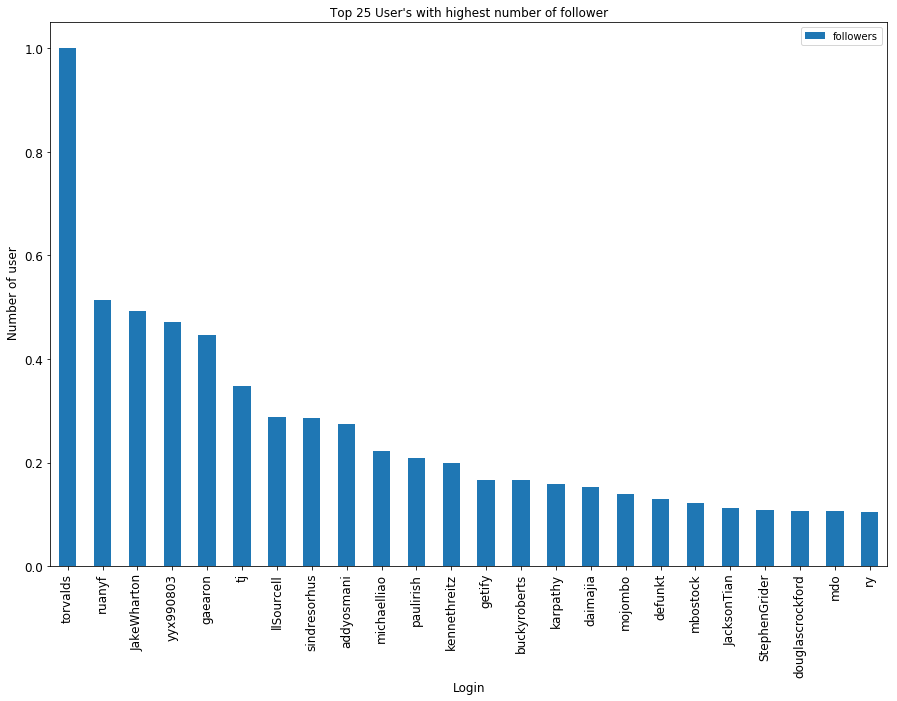

In [30]:
ax = full_user_detail.head(24)[['followers']].plot(kind='bar', title ="Top 25 User's with highest number of follower", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(full_user_detail.head(24)['login'])
ax.set_xlabel("Login", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

## Popular user's repository count

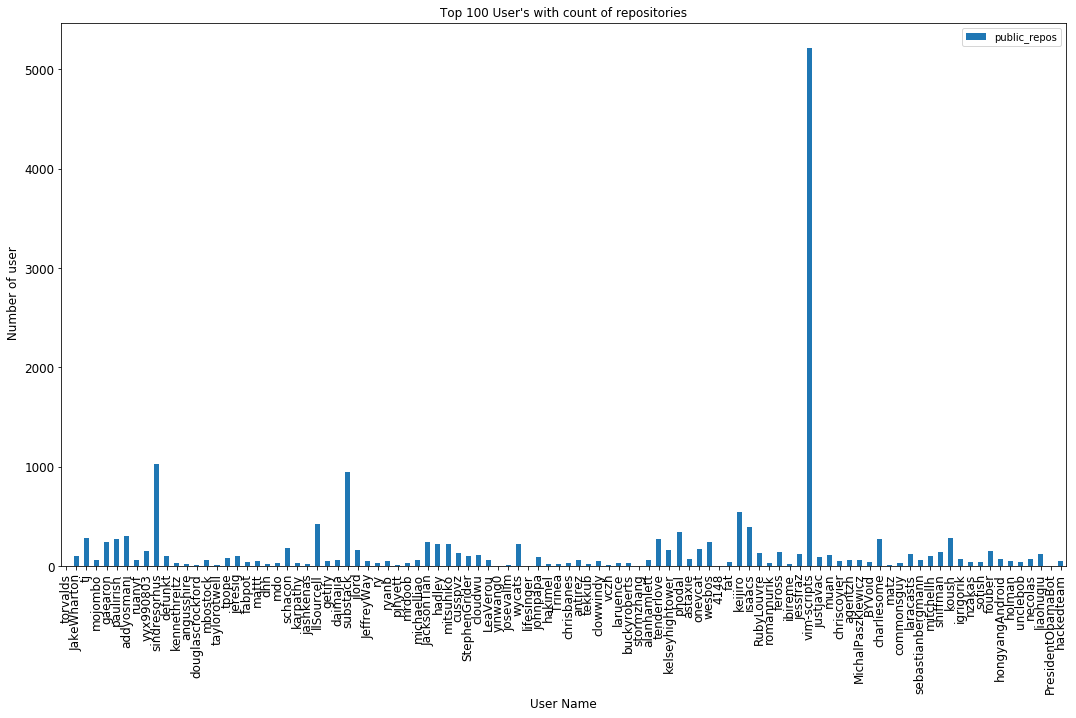

In [79]:
ax = full_user_detail[['public_repos']].plot(kind='bar', title ="Top 100 User's with count of repositories", figsize=(18, 10), legend=True, fontsize=12)
ax.set_xticklabels(full_user_detail['login'])
ax.set_xlabel("User Name", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

## Popular User's Following pattern

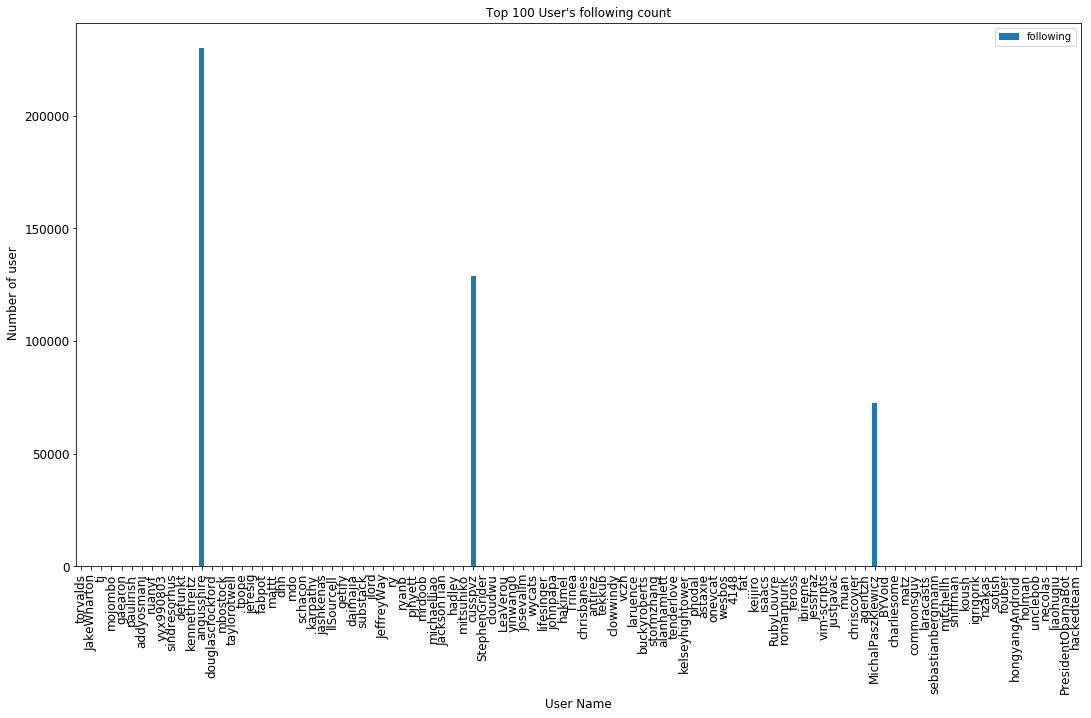

In [81]:
ax = full_user_detail[['following']].plot(kind='bar', title ="Top 100 User's following count", figsize=(18, 10), legend=True, fontsize=12)
ax.set_xticklabels(full_user_detail['login'])
ax.set_xlabel("User Name", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

#### * Above graph explains the behaviour of following by popular user's on github.
#### * It clearly explains that most (influencer or popular) users don't follow a lot of users.

## Finding Users joining date at GitHub (created_at)

In [50]:
full_user_detail['year'] = full_user_detail['created_at'].map(lambda x: int(x[0:4]))

In [53]:
full_user_detail[['login','year']].head()

,login,year
0,torvalds,2011
1,JakeWharton,2009
2,tj,2008
3,mojombo,2007
4,gaearon,2011


In [82]:
full_user_detail[['login','followers','following','public_repos','year']].to_excel('File User PageRank.xlsx', index=False)

## Distriution of Followers 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B30601A240>]],
      dtype=object)

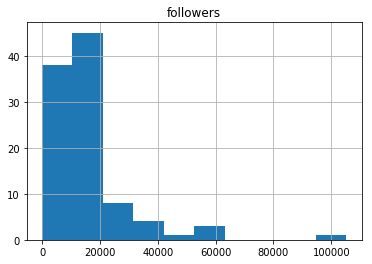

In [65]:
full_user_detail.hist(column="followers")

## Plots

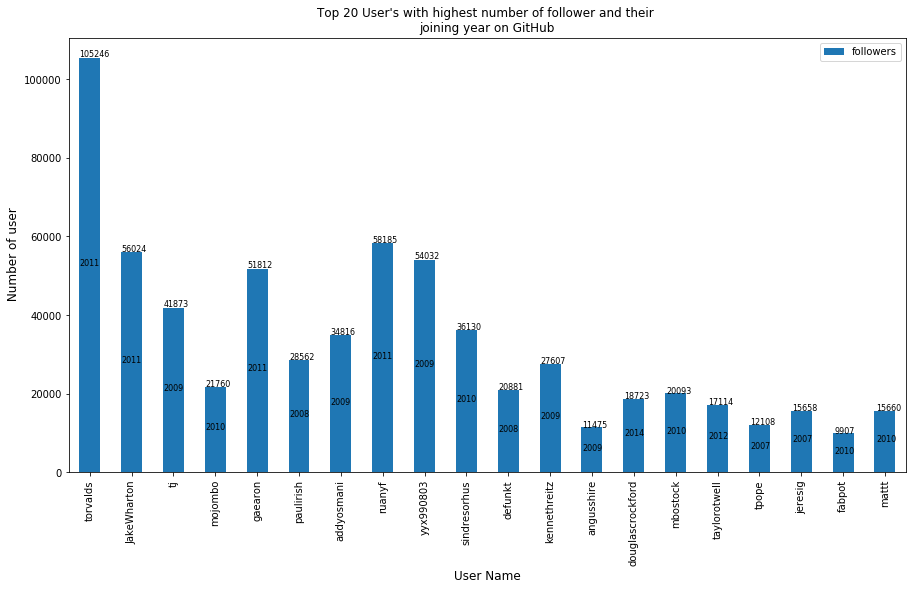

In [67]:
ax = full_user_detail.head(20)[['followers']].plot(kind='bar', title ="Top 20 User's with highest number of follower and their \njoining year on GitHub", figsize=(15, 8), legend=True, fontsize=10)
ax.set_xticklabels(full_user_detail.head(20)['login'])
ax.set_xlabel("User Name", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
bar_label = list(sorted_user_by_follower['year'].head(20))
i=0
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005),fontsize=8)
    ax.annotate(str(bar_label[i]), (p.get_x() * 1.002, p.get_height()/2),fontsize=8)
    i+=1
plt.show()

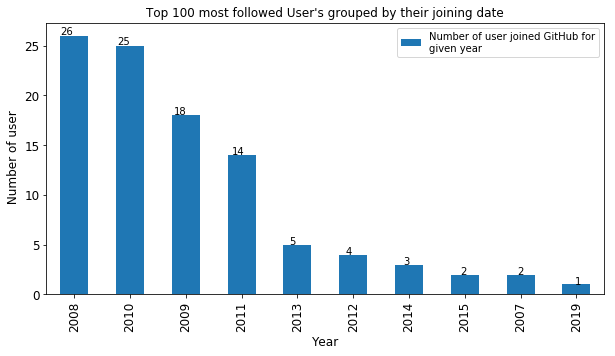

In [64]:
ax = full_user_detail['year'].value_counts().plot(kind='bar', title ="Top 100 most followed User's grouped by their joining date", figsize=(10, 5), label='Number of user joined GitHub for\ngiven year', legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.005))
plt.show()

#### * Git development began in April 2005, 14 years ago.
#### * This graph explains that many popular users joined GitHub at later years but still they became popular.
#### * 3 Users join in 2016 or 4 years ago and became popular.
#### * This concludes that for any user who wants to be an influencer on GitHub, it is not important to join no more than 2016 or 4 years ago.  